## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [130]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/cleaned_ecommerce_dataset.csv")
print("The E-Commerce dataset has the length of:  " + str(data.size))
num_rows, num_columns = data.shape
print("The E-Commerce dataset has the number of rows:  " + str(num_rows))
print("The E-Commerce dataset has the number of columns:  " + str(num_columns))

The E-Commerce dataset has the length of:  29535
The E-Commerce dataset has the number of rows:  2685
The E-Commerce dataset has the number of columns:  11


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [131]:
#To get an overview of the dataset
data.head(10)



,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
5,4081,100399,Good for sci-fi,Matrix,3.0,3.0,M,Movies,40,24.51,4
6,4081,100399,Scary? you bet!,Blair Witch Project,4.0,3.0,M,Movies,12,44.00,4
7,4081,101899,Fox - the 4th basic channel,FOX,4.0,4.0,M,Media,25,80.00,4
8,4081,112099,Amen!,Dogma,4.0,3.0,M,Movies,22,87.59,4
9,4081,122899,mama mia!,Olive Garden,4.0,3.0,M,Restaurants & Gourmet,49,32.00,4


In [132]:
data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [133]:
#Unique count in the columns helps in selecting the type of variable.
print(data.nunique())

userId          267
timestamp       844
review         2675
item             82
rating            5
helpfulness       2
gender            2
category          9
item_id          82
item_price       77
user_city        40
dtype: int64


In [134]:
data.category.value_counts()

Movies                      1190
Online Stores & Services     570
Restaurants & Gourmet        285
Hotels & Travel              189
Media                        134
Games                        118
Kids & Family                107
Personal Finance              63
Books                         29
Name: category, dtype: int64

**Initally, We will see the type of variable to do feature engineering.**
1. Ordered Categorical Variable(ORDINAL) - Rating, helpfulness - Label encoding
2. Unordered categorical variable(Nominal) - city, item id or item, category, gender - Dummy vaiable   
3. Numerical Vriable - price, userid, timestamp
4. Binary - Gender

In [135]:
#Selecting the required columns/variables for the modelling.
data = data[["helpfulness","gender", "category", "review", "rating"]]

In [136]:
#Preprocessing the Variables for using it in Linear Regression Model
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["gender_code"] = ord_enc.fit_transform(data[["gender"]])
print(data[["gender", "gender_code"]].head(5))
print("-----------------------------------------")

data["category_code"] = ord_enc.fit_transform(data[["category"]])
print(data[["category", "category_code"]].head(5))
print("-----------------------------------------")

data["review_code"] = ord_enc.fit_transform(data[["review"]])
print(data[["review", "review_code"]].head(5))
print("-----------------------------------------")



  gender  gender_code
0      M          1.0
1      M          1.0
2      M          1.0
3      M          1.0
4      M          1.0
-----------------------------------------
                category  category_code
0  Restaurants & Gourmet            8.0
1  Restaurants & Gourmet            8.0
2  Restaurants & Gourmet            8.0
3                 Movies            5.0
4                 Movies            5.0
-----------------------------------------
                                            review  review_code
0                                Not always McCrap       1618.0
1  I dropped the chalupa even before he told me to       1125.0
2                     The Wonderful World of Wendy       2185.0
3                             They actually did it       2243.0
4                             Hey! Gimme some pie!       1033.0
-----------------------------------------


In [137]:
#Correlation Table for selection the Correlated Variables
correlation = data[["helpfulness","gender_code", "category_code", "review_code", "rating"]].corr()
correlation

,helpfulness,gender_code,category_code,review_code,rating
helpfulness,1.000000,0.075947,-0.013408,-0.028259,-0.007523
gender_code,0.075947,1.000000,0.022549,-0.037884,-0.034337
category_code,-0.013408,0.022549,1.000000,0.001970,-0.163158
review_code,-0.028259,-0.037884,0.001970,1.000000,-0.036118
rating,-0.007523,-0.034337,-0.163158,-0.036118,1.000000


In [138]:
#Sorting the Correlation based upon the values
correlation.rating.sort_values()


category_code   -0.163158
review_code     -0.036118
gender_code     -0.034337
helpfulness     -0.007523
rating           1.000000
Name: rating, dtype: float64

**Analysis:** The **Top 2** Correlated features are review_code and category code
The **Bottom 2** Correlated features are helpfulnes and gender_code. values closer to -1 and 1 are more correlated than compare to the values close to zero.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [139]:
#Before splitting the data checking the original shape of data
data.shape

(2685, 8)

In [140]:
#Train Test split from The Scikit Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print(data.shape)
X =  data[["helpfulness","gender_code", "category_code", "review_code"]]
y =  data["rating"]

#Case 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.9, random_state=42)
#Case 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the shapes of the resulting sets to verify
print("Case 1: X_train shape:", X_train1.shape)
print("Case 1: X_test shape:", X_test1.shape)
print("Case 1: y_train shape:", y_train1.shape)
print("Case 1: y_test shape:", y_test1.shape)


print("-----------------------------------------")

print("Case 2: X_train shape:", X_train2.shape)
print("Case 2: X_test shape:", X_test2.shape)
print("Case 2: y_train shape:", y_train2.shape)
print("Case 2: y_test shape:", y_test2.shape)


(2685, 8)
Case 1: X_train shape: (268, 4)
Case 1: X_test shape: (2417, 4)
Case 1: y_train shape: (268,)
Case 1: y_test shape: (2417,)
-----------------------------------------
Case 2: X_train shape: (2416, 4)
Case 2: X_test shape: (269, 4)
Case 2: y_train shape: (2416,)
Case 2: y_test shape: (269,)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [149]:
#Using the Sci Kit for the Linear regression model
from sklearn.linear_model import LinearRegression
#The Top 2 Correlated features are review_code and category code
#The bottom 2 Correlated features are helpfulnes and gender_code
#Model A
modelA = LinearRegression()
modelA.fit(X_train1[["review_code","category_code"]], y_train1)
predictedA = modelA.predict(X_test1[["review_code","category_code"]])

#Model B
modelB = LinearRegression()
modelB.fit(X_train1[["helpfulness", "gender_code"]], y_train1)
predictedB = modelB.predict(X_test1[["helpfulness", "gender_code"]])

#Model C
modelC = LinearRegression()
modelC.fit(X_train2[["review_code","category_code"]], y_train2)
predictedC = modelC.predict(X_test2[["review_code","category_code"]])

#Model D
modelD = LinearRegression()
modelD.fit(X_train2[["helpfulness", "gender_code"]], y_train2)
predictedD = modelD.predict(X_test2[["helpfulness", "gender_code"]])




### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [150]:
#Evaluating the model based upon the MSE and RMSE
from sklearn.metrics import mean_squared_error
mseA = mean_squared_error(y_test1, predictedA)
rmseA = np.sqrt(mseA)
print(f"MODEL A Mean Squared Error (MSE): {mseA}")
print(f"MODEL A Root Mean Squared Error (RMSE): {rmseA}")

MODEL A Mean Squared Error (MSE): 1.776581354691434
MODEL A Root Mean Squared Error (RMSE): 1.3328845991650717


In [151]:

mseB = mean_squared_error(y_test1, predictedB)
rmseB = np.sqrt(mseB)
print(f"MODEL B Mean Squared Error (MSE): {mseB}")
print(f"MODEL B Root Mean Squared Error (RMSE): {rmseB}")

MODEL B Mean Squared Error (MSE): 1.860535990321889
MODEL B Root Mean Squared Error (RMSE): 1.3640146591301316


In [152]:

mseC = mean_squared_error(y_test2, predictedC)
rmseC = np.sqrt(mseC)
print(f"MODEL C Mean Squared Error (MSE): {mseC}")
print(f"MODEL C Root Mean Squared Error (RMSE): {rmseC}")

MODEL C Mean Squared Error (MSE): 1.681992500504392
MODEL C Root Mean Squared Error (RMSE): 1.2969165356739007


In [153]:

mseD = mean_squared_error(y_test2, predictedD)
rmseD = np.sqrt(mseD)
print(f"MODEL D Mean Squared Error (MSE): {mseD}")
print(f"MODEL D Root Mean Squared Error (RMSE): {rmseD}")

MODEL D Mean Squared Error (MSE): 1.7245375467700426
MODEL D Root Mean Squared Error (RMSE): 1.3132164889194937


**ANALYSIS** -
**Mean Squared Error (MSE)**: This is the most commonly used metric for evaluating a Linear Regression model. It measures the average of the squared differences between the predicted values and the actual values. A lower MSE indicates better performance.

**Root Mean Squared Error (RMSE)**: This is the square root of the MSE and provides a more interpretable metric since it is in the same units as the target variable.**

**Lower the RMSE and MSE, better the Model.**

In [154]:
#creating the Data frame for RMSE and MSE
data = {'Model': ['Model A', 'Model B', 'Model C','Model D'],
        'RMSE': [rmseA,rmseB,rmseC,rmseD]}


RMSE_df = pd.DataFrame(data)
RMSE_df

,Model,RMSE
0,Model A,1.332885
1,Model B,1.364015
2,Model C,1.296917
3,Model D,1.313216


In [155]:
data2 = {'Model': ['Model A', 'Model B', 'Model C','Model D'],
        'MSE': [mseA,mseB,mseC,mseD]}


MSE_df = pd.DataFrame(data2)
MSE_df

,Model,MSE
0,Model A,1.776581
1,Model B,1.860536
2,Model C,1.681993
3,Model D,1.724538


**ANALYSIS:** As per the above values of RMSE, we can say that model C is the best model among all.
Therefore, Model whose training dataset is big and the model which uses the highly correalted features give better results than using low correlated features and training on low portion of dataset.

### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

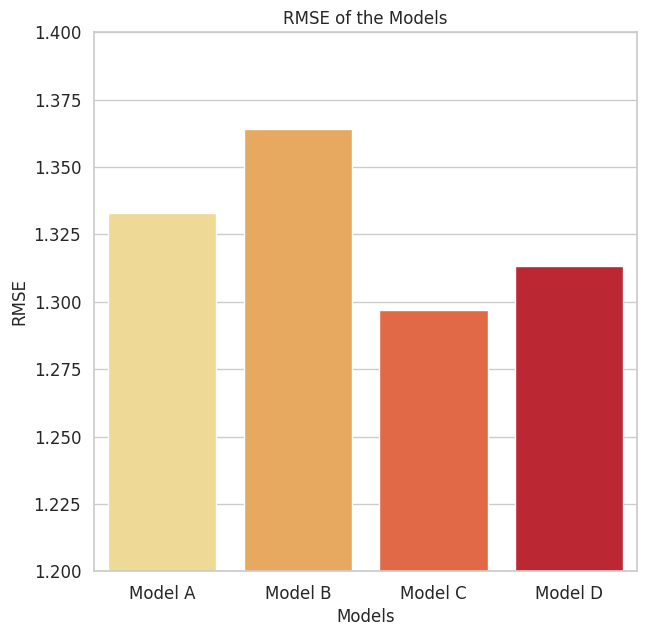

In [148]:
#Visulaing the metrics of MSE and RMSE
import seaborn as sns
import matplotlib.pyplot as plt



# Create a Seaborn bar plot
sns.set(style="whitegrid")  # Set the style, you can choose different styles
plt.figure(figsize=(7,7))  # Set the figure size

# Create the bar plot
sns.barplot(x= RMSE_df.Model, y=RMSE_df.RMSE, palette="YlOrRd")
 # You can choose different color palettes

# Add labels and a title
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("RMSE of the Models")
plt.ylim(1.2, 1.40)  # Customize the y-axis limits as needed

# Customize the tick labels or appearance
plt.xticks(fontsize=12)  # X-axis label font size
plt.yticks(fontsize=12)  # Y-axis label font size

# Show the plot
plt.show()

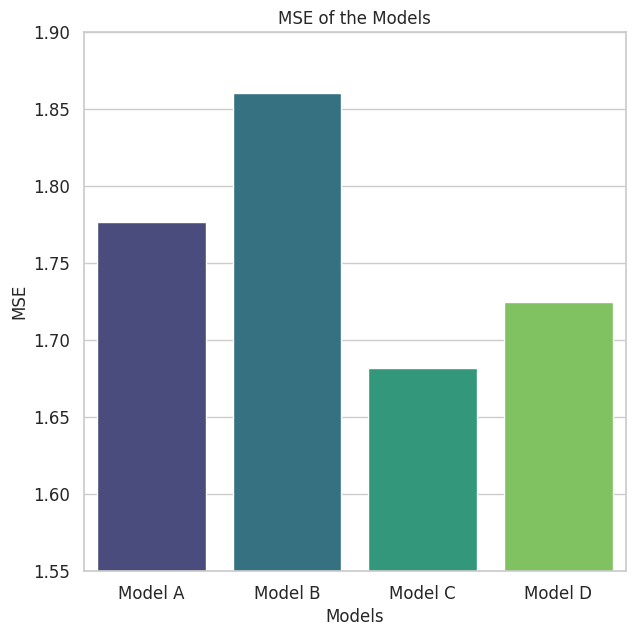

In [110]:

# Create a Seaborn bar plot
sns.set(style="whitegrid")  # Set the style, you can choose different styles
plt.figure(figsize=(7,7))  # Set the figure size

# Create the bar plot
sns.barplot(x= MSE_df.Model, y = MSE_df.MSE, palette="viridis")  # You can choose different color palettes

# Add labels and a title
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE of the Models")
plt.ylim(1.55, 1.90)  # Customize the y-axis limits as needed

# Customize the tick labels or appearance
plt.xticks(fontsize=12)  # X-axis label font size
plt.yticks(fontsize=12)  # Y-axis label font size

# Show the plot
plt.show()

# **Summary with Insightful Analysis**
### The goal of the task was to predict the ratings of the user using linear Regression. During the analysis, we converted Gender, Category and Review from categorical to numerical values using the Ordinal Encoder.


### Then we looked for the correlation between Rating, Review, Helpfulness and Gender. The Top 2 Correlated features are review and category.The bottom 2 Correlated features are helpfulnes and gender.



### Splitting the data is crucial as it helps evaluating the model with the metrics like RMSE.



### Then we created 4 models - A,B,C,D. During the evaluation of all the models, we found that Model C was highest performing as it has Lowest RMSE and MSE.

### As we can also see from the graphs the Model C has lowest MSE and the lowest RMSE which shows the model C is most accurate among the all four models.

### **Model C** has the training data set of 90% which shows more data points are used for training the model, which helps the model for finding more relations among the dependent variable and independent variables. Linear regression estimates coefficients (weights) for each feature to fit the data. With more data points, these parameter estimates tend to be more stable and closer to their true values, improving the model's accuracy.

### Model C also uses the 2 most correlated features as their dependent variables review and category. Higher the correlation with the Target variable results in Improved Model Fit, enhanced Predictive Power and stability of coefficients estimates.

